This tutorial provides simple examples to learn how to use the functions provided by Preprocesspack package. First we are going to load the modules needed.

In [1]:
from preprocesspack import utils, Attribute, DataSet, graphics

First we are going to create an Attribute object. There are several ways of creating an object. In this example we have created three Attributes.

In [2]:
attr=Attribute.Attribute(name="age",vector=[34,16,78,90,12])
attrContinuous=Attribute.Attribute(name="mark",vector=[1.2,3.4,6.7,8.9,4.7])
attrPass=Attribute.Attribute(name="pass",vector=[0,0,1,1,0])

attr.printAttribute()

age
34
16
78
90
12



To create a DataSet we can add a previously defined attribute or pass a vector. The name of each column will be the attribute name.

In [3]:
ds=DataSet.DataSet([],name="Students")
ds.addAttribute(attr)
ds.addAttribute(attrContinuous)
ds.addAttribute(attrPass)
ds.printDataSet()

age     	mark    	pass    	
34		1.2		0		
16		3.4		0		
78		6.7		1		
90		8.9		1		
12		4.7		0		



From now on the tutorial will focus in how to use the preprocesspack in an external DataSet. We will use a DataSet called wine data that includes the information (alcohol quantity, color intensity, magnesium...) of two wine types. In this step we have loaded the data from a csv file using loadDataSet function. This function loads the csv file content into a DataSet. In this example the loaded file is separated by , and the first row works as the column name for the file.

In [4]:
wineData=DataSet.loadDataSet("wine_data_reduced.csv")
wineData.printDataSet()

Class   	Alcohol 	Malid ac	Ash     	Alcalini	Magnesiu	 Total p	
0		14.23		1.71		2.43		15.6		127		2.8		
0		13.2		1.78		2.14		11.2		100		2.65		
0		13.16		2.36		2.67		18.6		101		2.8		
0		14.37		1.95		2.5		16.8		113		3.85		
0		13.24		2.59		2.87		21.0		118		2.8		
0		14.2		1.76		2.45		15.2		112		3.27		
0		14.39		1.87		2.45		14.6		96		2.5		
0		14.06		2.15		2.61		17.6		121		2.6		
0		14.83		1.64		2.17		14.0		97		2.8		
0		13.86		1.35		2.27		16.0		98		2.98		
0		14.1		2.16		2.3		18.0		105		2.95		
0		14.12		1.48		2.32		16.8		95		2.2		
0		13.75		1.73		2.41		16.0		89		2.6		
0		14.75		1.73		2.39		11.4		91		3.1		
0		14.38		1.87		2.38		12.0		102		3.3		
0		13.63		1.81		2.7		17.2		112		2.85		
0		14.3		1.92		2.72		20.0		120		2.8		
0		13.83		1.57		2.62		20.0		115		2.95		
0		14.19		1.59		2.48		16.5		108		3.3		
0		13.64		3.1		2.56		15.2		116		2.7		
1		12.37		0.94		1.36		10.6		88		1.98		
1		12.33		1.1		2.28		16.0		101		2.05		
1		12.64		1.36		2.02		16.8		100		2.02		
1		13.67		1.25		1.92		18.0		94		2.1		
1		12.3

The first step with this DataSet will be to discretize the Alcohol and Magnesium columns of the data, as it can be easily noticed that both can be divided into three intervals. DataSet and Attribute objects can be discretized using the function discretize. This function computes two types of discretization: on the one hand, by assigning the "EW" value to the type parameter equal width discretization is computed. On the other hand, assigning "EF" value to the parameter computes equal width discretization. Num.bins parameter indicates how many intervals are going to be made. In the following example we will compute an equal width discretization of the both columns (2 and 6). Moreover, we will compute an Equal Frecuency discretization in the last attribute, using num.bins=5

In [5]:

wineData=wineData.discretize(3,"EW",[1,5])
wineData=wineData.discretize(5,"EF",[6])
wineData.printDataSet()

8
16
24
32
40
Class   	Alcohol 	Malid ac	Ash     	Alcalini	Magnesiu	 Total p	
0		(13.773333333333333, inf)		1.71		2.43		15.6		(126.66666666666666, inf)		(2.8, 3.5)		
0		(12.716666666666667, 13.773333333333333)		1.78		2.14		11.2		(-inf, 102.33333333333333)		(-inf, 2.8)		
0		(12.716666666666667, 13.773333333333333)		2.36		2.67		18.6		(-inf, 102.33333333333333)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1.95		2.5		16.8		(102.33333333333333, 126.66666666666666)		(2.95, inf)		
0		(12.716666666666667, 13.773333333333333)		2.59		2.87		21.0		(102.33333333333333, 126.66666666666666)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1.76		2.45		15.2		(102.33333333333333, 126.66666666666666)		(2.95, inf)		
0		(13.773333333333333, inf)		1.87		2.45		14.6		(-inf, 102.33333333333333)		(-inf, 2.8)		
0		(13.773333333333333, inf)		2.15		2.61		17.6		(102.33333333333333, 126.66666666666666)		(-inf, 2.8)		
0		(13.773333333333333, inf)		1.64		2.17		14.0		(-inf, 102.33333333333333)		(2.8, 3.5)		
0		(13.7733333333

Single attributes can also be discretized:


In [6]:
attr=Attribute.Attribute(name="age",vector=[34,16,78,90,12])
age_category=attr.discretize(2,"EW")
age_category.printAttribute()


age
(-inf, 51.0)
(-inf, 51.0)
(51.0, inf)
(51.0, inf)
(-inf, 51.0)


The function normalize is used to normalize the data or an attribute. When applied to a DataSet, columns parameter indicate to which columns the normalization have to be applied. In this case I will apply it to the following columns: 2,3,4,6. 

In [7]:
wineDataNormalized=wineData.normalize([2,3,4,6])
wineDataNormalized.printDataSet()

Class   	Alcohol 	Malid ac	Ash     	Alcalini	Magnesiu	 Total p	
0		(13.773333333333333, inf)		1.71		2.43		15.6		(126.66666666666666, inf)		(2.8, 3.5)		
0		(12.716666666666667, 13.773333333333333)		1.78		2.14		11.2		(-inf, 102.33333333333333)		(-inf, 2.8)		
0		(12.716666666666667, 13.773333333333333)		2.36		2.67		18.6		(-inf, 102.33333333333333)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1.95		2.5		16.8		(102.33333333333333, 126.66666666666666)		(2.95, inf)		
0		(12.716666666666667, 13.773333333333333)		2.59		2.87		21.0		(102.33333333333333, 126.66666666666666)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1.76		2.45		15.2		(102.33333333333333, 126.66666666666666)		(2.95, inf)		
0		(13.773333333333333, inf)		1.87		2.45		14.6		(-inf, 102.33333333333333)		(-inf, 2.8)		
0		(13.773333333333333, inf)		2.15		2.61		17.6		(102.33333333333333, 126.66666666666666)		(-inf, 2.8)		
0		(13.773333333333333, inf)		1.64		2.17		14.0		(-inf, 102.33333333333333)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1

If the columns parameter is empty and the normalize function is applied to the hole DataSet it will return the original attribute if applied to categorical attributes and will normalize the rest.

In [8]:
wineDataNormalized=wineData.normalize()
wineDataNormalized.printDataSet()

Class   	Alcohol 	Malid ac	Ash     	Alcalini	Magnesiu	 Total p	
0		(13.773333333333333, inf)		1.71		2.43		15.6		(126.66666666666666, inf)		(2.8, 3.5)		
0		(12.716666666666667, 13.773333333333333)		1.78		2.14		11.2		(-inf, 102.33333333333333)		(-inf, 2.8)		
0		(12.716666666666667, 13.773333333333333)		2.36		2.67		18.6		(-inf, 102.33333333333333)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1.95		2.5		16.8		(102.33333333333333, 126.66666666666666)		(2.95, inf)		
0		(12.716666666666667, 13.773333333333333)		2.59		2.87		21.0		(102.33333333333333, 126.66666666666666)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1.76		2.45		15.2		(102.33333333333333, 126.66666666666666)		(2.95, inf)		
0		(13.773333333333333, inf)		1.87		2.45		14.6		(-inf, 102.33333333333333)		(-inf, 2.8)		
0		(13.773333333333333, inf)		2.15		2.61		17.6		(102.33333333333333, 126.66666666666666)		(-inf, 2.8)		
0		(13.773333333333333, inf)		1.64		2.17		14.0		(-inf, 102.33333333333333)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1

Single attributes can also be normalized. If the attribute is categorical the result will be the original attribute

In [9]:
attrNorm=attrContinuous.normalize()
attrNorm.printAttribute()

attrNorm=age_category.normalize()
attrNorm.printAttribute()


mark
0.0
1.8333333333333335
4.583333333333334
6.416666666666667
2.916666666666667
age
(-inf, 51.0)
(-inf, 51.0)
(51.0, inf)
(51.0, inf)
(-inf, 51.0)


To standardize the data or an attribute the function standardize can be used. When applied to a DataSet, columns parameter indicate to which columns the normalization have to be applied. In this case I will apply it to the following columns: 2,3,4,6.


In [10]:
wineDataStandardized=wineData.standardize([2,3,4,6])
wineDataStandardized.printDataSet()

Class   	Alcohol 	Malid ac	Ash     	Alcalini	Magnesiu	 Total p	
0		(13.773333333333333, inf)		1.71		2.43		15.6		(126.66666666666666, inf)		(2.8, 3.5)		
0		(12.716666666666667, 13.773333333333333)		1.78		2.14		11.2		(-inf, 102.33333333333333)		(-inf, 2.8)		
0		(12.716666666666667, 13.773333333333333)		2.36		2.67		18.6		(-inf, 102.33333333333333)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1.95		2.5		16.8		(102.33333333333333, 126.66666666666666)		(2.95, inf)		
0		(12.716666666666667, 13.773333333333333)		2.59		2.87		21.0		(102.33333333333333, 126.66666666666666)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1.76		2.45		15.2		(102.33333333333333, 126.66666666666666)		(2.95, inf)		
0		(13.773333333333333, inf)		1.87		2.45		14.6		(-inf, 102.33333333333333)		(-inf, 2.8)		
0		(13.773333333333333, inf)		2.15		2.61		17.6		(102.33333333333333, 126.66666666666666)		(-inf, 2.8)		
0		(13.773333333333333, inf)		1.64		2.17		14.0		(-inf, 102.33333333333333)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1

If the columns parameter is empty and the standardize function is applied to the hole DataSet it will return the original attribute if applied to categorical attributes and will standardize the rest.

In [11]:
wineDataStandardized=wineData.standardize()
wineDataStandardized.printDataSet()

Class   	Alcohol 	Malid ac	Ash     	Alcalini	Magnesiu	 Total p	
0		(13.773333333333333, inf)		1.71		2.43		15.6		(126.66666666666666, inf)		(2.8, 3.5)		
0		(12.716666666666667, 13.773333333333333)		1.78		2.14		11.2		(-inf, 102.33333333333333)		(-inf, 2.8)		
0		(12.716666666666667, 13.773333333333333)		2.36		2.67		18.6		(-inf, 102.33333333333333)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1.95		2.5		16.8		(102.33333333333333, 126.66666666666666)		(2.95, inf)		
0		(12.716666666666667, 13.773333333333333)		2.59		2.87		21.0		(102.33333333333333, 126.66666666666666)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1.76		2.45		15.2		(102.33333333333333, 126.66666666666666)		(2.95, inf)		
0		(13.773333333333333, inf)		1.87		2.45		14.6		(-inf, 102.33333333333333)		(-inf, 2.8)		
0		(13.773333333333333, inf)		2.15		2.61		17.6		(102.33333333333333, 126.66666666666666)		(-inf, 2.8)		
0		(13.773333333333333, inf)		1.64		2.17		14.0		(-inf, 102.33333333333333)		(2.8, 3.5)		
0		(13.773333333333333, inf)		1

Single attributes can also be standardized. If the attribute is categorical the result will be the original attribute

In [12]:
attrStd=attrContinuous.standardize()
attrStd.printAttribute()

attrStd=age_category.standardize()
attrStd.printAttribute()


mark
-1.4248840017881383
-0.5955864346098569
0.6483599161575655
1.4776574833358471
-0.10554696309541775
age
(-inf, 51.0)
(-inf, 51.0)
(51.0, inf)
(51.0, inf)
(-inf, 51.0)


Entropy function computes the entropy of an Attribute or a complete DataSet. In the case of continuous variables it returns None. The entropy of a given DataSet can be plotted using the entropyPlot function. In the following example we have computed the entropy of the Wine Data dataset, as there are only 4 categorical or discrete variables we have only 4 results.

[0.9995708393473224, 1.5788720570183736, None, None, None, 1.3247497144200895, 1.4552137931890252]


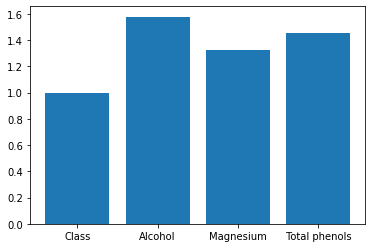

In [13]:
print(str(wineData.entropy()))
graphics.entropyPlot(wineData)

The entropy of single attributes can also be computed. If the attribute is not categorical the result will be None.

In [14]:
print(attrContinuous.entropy())
print (age_category.entropy())

None
0.9709505944546686


The package also includes a function to compute the variance of a DataDet or an Attribute. The variance function returns a vector with the variance of each column of the DataSet or a value in the case of the Attribute. If the attribute is a factor it will return None.

In [15]:
print(wineData.variance())

[0.2498512790005949, None, 0.37029541939321836, 0.10231171921475313, 13.642629387269485, None, None]


The variance function can also be applied to Attributes.


In [16]:
print(attrContinuous.variance())
print (age_category.variance())

7.0376
None


In order to analyze the relation between the data, the correlation function computes the correlation between the Attribute pairs of a DataSet. It calculates the correlation matrix between continuous variables and the mutual information between categorical ones. In the case where one of the variables is categorical and the other one discrete a discretization is computed in the continuous one. The parameters of the correlation function are the DataSet, num.bins and discretizationType. The default value of the last two is 3 and "EW". In the following example the correlation between the standardized wineData DataSet is computed.


In [17]:
print(wineDataStandardized.correlation())

[[ 1.          0.40036882 -0.360096   -0.52998158  0.34937507  0.0582239
   0.10514007]
 [ 0.40036882  1.09439071  0.10264858  0.12943356  0.0694872   0.02751501
   0.1561628 ]
 [-0.360096    0.10264858  1.          0.48744897  0.17908969  0.12763826
   0.10179586]
 [-0.52998158  0.12943356  0.48744897  1.          0.39673597  0.0910056
   0.11043564]
 [ 0.34937507  0.0694872   0.17908969  0.39673597  1.          0.12342519
   0.0645761 ]
 [ 0.0582239   0.02751501  0.12763826  0.0910056   0.12342519  0.91824653
   0.01192319]
 [ 0.10514007  0.1561628   0.10179586  0.11043564  0.0645761   0.01192319
   1.00867734]]


With the correlationPlot function the correlation can be displayed graphically. The plot type used for that is a HeatMap that is darker where the correlation between the Attributes is higher.

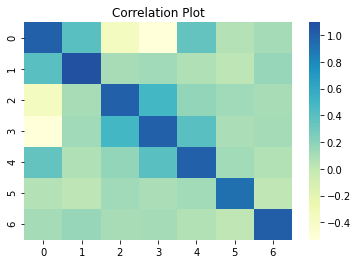

In [18]:
 graphics.correlationPlot(wineDataStandardized)

Another useful function of this package is the filter function. This function removes from the data the attributes with a correlation above the given threshold. If a function is passed through FUN parameter is given the filter function will apply the function to the data and remove the attributes that have a higher score than the threshold for the given function. Inverse parameter indicates whether the attributes have to be behind the thresshold in order to be removed, its default value is False. In the following example, first the attributes with a correlation higher than 0.4 are removed: Class.


In [28]:
filteredWineData=wineDataStandardized.filter(0.4)
filteredWineData.printDataSet()

Alcohol 	Malid ac	Alcalini	Magnesiu	 Total p	
(13.773333333333333, inf)		1.71		15.6		(126.66666666666666, inf)		(2.8, 3.5)		
(12.716666666666667, 13.773333333333333)		1.78		11.2		(-inf, 102.33333333333333)		(-inf, 2.8)		
(12.716666666666667, 13.773333333333333)		2.36		18.6		(-inf, 102.33333333333333)		(2.8, 3.5)		
(13.773333333333333, inf)		1.95		16.8		(102.33333333333333, 126.66666666666666)		(2.95, inf)		
(12.716666666666667, 13.773333333333333)		2.59		21.0		(102.33333333333333, 126.66666666666666)		(2.8, 3.5)		
(13.773333333333333, inf)		1.76		15.2		(102.33333333333333, 126.66666666666666)		(2.95, inf)		
(13.773333333333333, inf)		1.87		14.6		(-inf, 102.33333333333333)		(-inf, 2.8)		
(13.773333333333333, inf)		2.15		17.6		(102.33333333333333, 126.66666666666666)		(-inf, 2.8)		
(13.773333333333333, inf)		1.64		14.0		(-inf, 102.33333333333333)		(2.8, 3.5)		
(13.773333333333333, inf)		1.35		16.0		(-inf, 102.33333333333333)		(2.95, inf)		
(13.773333333333333, inf)		2.16		18.0		(102.3333

In the following example the attributes with a variance higher than 2 will be removed. If we compute the variance we see that the attributes that have to be removed are the fifth (Alcalinity of ash) and the 11th one (Color intensity).

In [39]:
import numpy as np
print(wineData.variance())
filteredWineData=wineData.filter(13,np.mean)
filteredWineData.printDataSet()

[None, 0.37029541939321836, 13.642629387269485, None, None]


/home/nuria/.local/lib/python3.8/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce


ValueError: list.remove(x): x not in list

Using the RocAuc function the area behind the ROC curve can be calculated. The RocAuc function takes as parameters: a DataSet, a variable and a class index and returns the area behind the ROC curve. In order to visualize the curve, the function RocPlot plots the Roc curve of the given variable index. In the example the Iris dataset is loaded and the roc

-0.6666666666666667


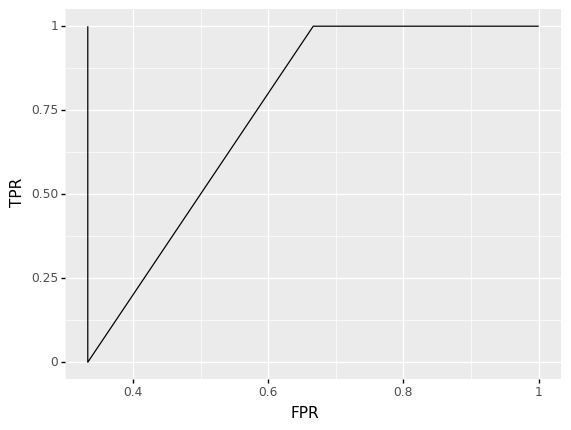

In [20]:
    print(ds.rocAuc(1,2))
graphics.rocPlot(ds,1,2)